# Chapter3: 非線形計画

In [2]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols, lambdify
from sympy.matrices import Matrix

## 3.1
(問) 次の関数の勾配とヘッセ行列を求めよ.

(答) 

(i) $f(\bm{x}) = 2x_{1}^{3} - x_{1}^{2}x_{2} + 2x_{2}^{2}$
$$\nabla f(\bm{x}) = \left[\begin{matrix}6x_{1}^{2} - 2x_{1}x_{2} \\ - x_{1}^{2} + 4x_{2}\end{matrix}\right],
\nabla^{2} f(\bm{x}) = \left[\begin{matrix}12x_{1} - 2x_{2} & -2x_{1} \\ -2x_{1} & 4\end{matrix}\right] $$

(ii) $f(\bm{x}) = (x_{1} - 3)^{2} + x_{1}x_{2} + \frac{1}{16}x_{2}^{4} + (x_{2} - 1)^{2}$
$$\nabla f(\bm{x}) = \left[\begin{matrix}
2(x_{1} - 3) + x_{2} \\ 
x_{1} + \frac{1}{4}x_{2}^{3} + 2(x_{2} - 1)
\end{matrix}\right],
\nabla^{2} f(\bm{x}) = \left[\begin{matrix}
2 & 1 \\ 
1 & \frac{3}{4}x_{2}^{2} + 2
\end{matrix}\right] $$

(iii)リッジ回帰の目的関数$f(\bm{x})=\|A\bm{x}-\bm{b}\|_{2}^{2} + \gamma\|\bm{x}\|_{2}^{2}$
$$\nabla f(\bm{x}) = 2A^{\top}A\bm{x} - 2A^{\top}\bm{b} + 2\gamma \bm{x},
\nabla^{2} f(\bm{x}) = 2A^{\top}A + 2\gamma I$$

(iv)ロジスティクス損失関数$f(\bm{x})=\sum_{j=1}^{n}\log(1 + \exp(-x_{j}))$
$$\nabla f(\bm{x}) = \left[\begin{matrix}
\frac{-1}{1 + \exp(x_{1})} \\ 
\vdots \\
\frac{-1}{1 + \exp(x_{n})}
\end{matrix}\right],
\nabla^{2} f(\bm{x}) = \left[\begin{matrix}
\frac{\exp(x_{1})}{(1 + \exp(x_{1}))^{2}} & 0 & \dots & 0 \\ 
0 & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 \\
0 & \dots & 0 & \frac{\exp(x_{n})}{(1 + \exp(x_{n}))^{2}} \\
\end{matrix}\right] $$

(v) log-sum-exp関数$f(\bm{x})=\log\left(\sum_{j=1}^{n}\exp(x_{j})\right)$. この関数は混合正規分布を用いた最尤推定やロジスティック回帰に基づく多クラス分類などに現れる. また, $\|x\|_{\infty}=\max\{|x_{1}|, \dots, |x_{n}|\}$を近似する関数としてしばしば用いられる.
$$\nabla f(\bm{x}) = \frac{1}{\sum_{j=1}^{n}\exp(x_{j})}\left[\begin{matrix}
\exp(x_{1}) \\ 
\vdots \\
\exp(x_{n})
\end{matrix}\right]$$
$$\nabla^{2} f(\bm{x}) = \frac{1}{(\sum_{j=1}^{n}\exp(x_{j}))^{2}}\left[\begin{matrix}
\exp(x_{1})(\sum_{j=1}^{n}\exp(x_{j})-\exp(x_{1})) & -\exp(x_{2})\exp(x_{1}) & \dots & -\exp(x_{n})\exp(x_{1}) \\ 
-\exp(x_{1})\exp(x_{2}) & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & -\exp(x_{n-1})\exp(x_{n}) \\
-\exp(x_{n})\exp(x_{1}) & \dots & -\exp(x_{n})\exp(x_{n-1}) & \exp(x_{n})(\sum_{j=1}^{n}\exp(x_{j})-\exp(x_{n})) \\
\end{matrix}\right] $$

## 3.2
(問) 例3.11の設定において, 連立一次方程式(3.32)$A\bm{x}=\bm{b}$の解と無制約最適化問題(3.33)$\text{ Minimize }\frac{1}{2}\bm{x}^{\top}A\bm{x}-\bm{b}^{\top}\bm{x}$の解が一致することを示せ. また, $\nabla^{2}f(\bm{x})=A$であることを示せ.

(答) 
Since $A$ is symetric positive definite matirix, FOC of (3.33) is $\nabla f(\bm{x})=A\bm{x} - \bm{b} = \bm{0}$, which is the same as (3.32). Note that 
$\nabla^{2}f(\bm{x})=A^{\top}=A$ is positive definite, so FOC lead global minimum.

## 3.3
(問) 練習問題3.1の(i), (ii)の関数について初期点を適当に定め, 最急降下法での最初の2反復目までを実際に計算してみよ. また同様にニュートン法での最初の2反復目までを実際に計算してみよ.

(i) $f(\bm{x}) = 2x_{1}^{3} - x_{1}^{2}x_{2} + 2x_{2}^{2}$
$$\nabla f(\bm{x}) = \left[\begin{matrix}6x_{1}^{2} - 2x_{1}x_{2} \\ - x_{1}^{2} + 4x_{2}\end{matrix}\right],
\nabla^{2} f(\bm{x}) = \left[\begin{matrix}12x_{1} - 2x_{2} & -2x_{1} \\ -2x_{1} & 4\end{matrix}\right] $$

(ii) $f(\bm{x}) = (x_{1} - 3)^{2} + x_{1}x_{2} + \frac{1}{16}x_{2}^{4} + (x_{2} - 1)^{2}$
$$\nabla f(\bm{x}) = \left[\begin{matrix}
2(x_{1} - 3) + x_{2} \\ 
x_{1} + \frac{1}{4}x_{2}^{3} + 2(x_{2} - 1)
\end{matrix}\right],
\nabla^{2} f(\bm{x}) = \left[\begin{matrix}
2 & 1 \\ 
1 & \frac{3}{4}x_{2}^{2} + 2
\end{matrix}\right] $$

In [22]:
def gradient_decent(f, var, x_init, alpha, step = 100, epsilon = 0, keep_history = False):
    """
    Gradient decent method
    return: np.ndarray if keep_history, it has trajectory
    input:
        f: sympy expression where matrix var to minimize
        var: sympy matrix which is variable to minimize
        x_init: np.ndarray of init value for x
        alpha: float of parameter
        step: max step number
        eplison: threshold to stop iteration based on norm of derivative 
        keep_history: bool
    """
    
    counter = 0
    x = x_init
    if keep_history:
        history = x.reshape(1, len(x)).copy()

    df = lambdify(var, f.diff(var), 'numpy')
    dfx = df(*x).reshape(len(x))
    while counter < step and np.linalg.norm(dfx) > epsilon:
        x += alpha * (-dfx)
        counter += 1
        dfx = df(*x).reshape(len(x))
        if keep_history:
            history = np.append(history, x.reshape(1, len(x)), axis = 0)
    
    if keep_history:
        return history
    else:
        return x


In [94]:
def newton_method(f, var, x_init, alpha, step = 100, epsilon = 0, keep_history = False):
    """
    Newton method
    return: np.ndarray if keep_history, it has trajectory
    input:
        f: sympy expression where matrix var to minimize
        var: sympy matrix which is variable to minimize
        x_init: np.ndarray of init value for x
        alpha: float of parameter
        step: max step number
        eplison: threshold to stop iteration based on norm of derivative 
        keep_history: bool
    """
    
    counter = 0
    x = x_init
    if keep_history:
        history = x.reshape(1, len(x)).copy()

    df = lambdify(var, f.diff(var), 'numpy')
    ddf = lambdify(var, f.diff(var, 2).reshape(len(x), len(x)), 'numpy')
    while counter < step:
        dfx = df(*x).reshape(len(x))
        ddfx = np.array(ddf(*x))
        if np.linalg.det(ddf(*x)) == 0:
            print('Determinant of Hessian is 0')
            return False 
        d = np.linalg.inv(ddfx).dot(dfx).reshape(len(x))
        if np.linalg.norm(d) < epsilon:
            break 
    
        x += alpha * (-d)
        counter += 1
        dfx = df(*x).reshape(len(x))
        if keep_history:
            history = np.append(history, x.reshape(1, len(x)), axis = 0)
        
    if keep_history:
        return history
    else:
        return x


In [95]:
# (i)
x1, x2 = symbols('x1 x2')
x = Matrix([x1, x2])
f =  2 * x1**3 - x1**2 * x2 + 2 * x2**2
history_gd = gradient_decent(f, x, x_init=np.array([1., 1.]), alpha = 0.2, step = 3, keep_history=True)
print(history_gd)
history_nm = newton_method(f, x, x_init=np.array([1., 1.]), alpha = 1., step = 3, keep_history=True)
print(history_nm)

[[0.2       0.4      ]
 [0.2       0.4      ]
 [0.184     0.088    ]
 [0.1498496 0.0243712]]
[[ 1.00000000e+00  1.00000000e+00]
 [ 3.88888889e-01 -5.55555556e-02]
 [ 1.99114224e-01  9.08012749e-04]
 [ 9.94801082e-02 -7.66629297e-06]]


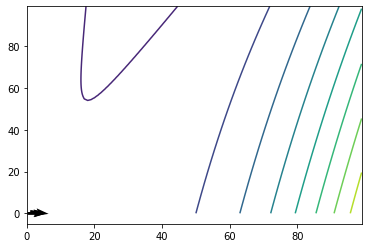

In [96]:
x1 = np.arange(100)
x2 = np.arange(100)
x1, x2 = np.meshgrid(x1, x2)
f = 2 * x1**3 - x1**2 * x2 + 2 * x2**2
for i in range(len(history_nm)-1):
    plt.quiver(*history_nm[i], *history_nm[i+1])
plt.contour(x1, x2, f)
plt.show()

## 3.4
(問) 次の制約付き最適化問題に対するKKT条件を書け. ただし, $A\in \mathbb{R}^{m \times n}$は定行列であり, $\bm{b}\in\mathbb{R}^{m}$は定ベクトルである.

(答) 

(i) 非負制約つき最小2乗法:
$$\begin{aligned}
\text{Minimize } &\frac{1}{2}\| A\bm{x} - \bm{b} \|_{2}^{2} \\
\text{subject to }& \bm{x} \ge \bm{0}
\end{aligned}$$
KKT condition:
$$
\begin{aligned}
& A^{\top}A\bm{x} - A^{\top}\bm{b} - \left[\begin{matrix}\lambda_{1} \\ \vdots \\ \lambda_{n}\end{matrix}\right] = \bm{0}, \\
& x_{i} \ge 0,\ \lambda_{i} \ge 0,\ \lambda_{i}x_{i} = 0, &  i = 1, \dots, n
\end{aligned}
$$

(ii)
$$\begin{aligned}
\text{Minimize } & \sum_{j=1}^{n}x_{j}\log x_{j}\\
\text{subject to } & \sum_{j=1}^{n}x_{j} = 1\\ & \bm{x} \ge \bm{0}
\end{aligned}$$
この形式は例えばエントロピー最大化によるノンパラメトリック推定に現れる

KKT condition:
$$
\begin{aligned}
& \log(x_{i}) + 1 - \lambda_{i} - \mu_{i} = 0 &  i = 1, \dots, n \\
& x_{j} \ge 0,\ \lambda_{j} \ge 0,\ \lambda_{j}x_{j} = 0, &  j = 1, \dots, n \\
& \sum_{k=1}^{n}x_{k}=1,\\
\end{aligned}
$$

## 3.5
(問) 2変数の非線形計画問題の例で, 局所最適解において1次独立制約想定が成り立たないものをつくり, その局所最適解でKKT条件を満たすラグランジュ定数が存在するか調べよ.

(答) 


## 3.6
(問) $\ell_{1}$ノルム正則化付き最小2乗法
$$\text{Minimize} \frac{1}{2}\left\|\sum_{j=1}^{n}x_{j}\bm{a}_{j}-\bm{b}\right\|_{2}^{2} + \gamma\sum_{j=1}^{n}|x_{j}|$$
に対する座標急降下法の更新は
$$x_{l} \leftarrow \frac{1}{\|\bm{a}_{l}\|_{2}^{2}}\psi\left( \left(\bm{b} - \sum_{j\neq l}x_{j}\bm{a}_{j} \right) ^{\top}\bm{a}_{l}\right)$$
とかけることを示せ.ただし, $\gamma$は正の定数であり,
$$\psi(s)=\begin{cases}
s-\gamma & (s > \gamma \text{のとき}),\\
0 & (|s| \le \gamma \text{のとき}), \\
s + \gamma & (s < -\gamma \text{のとき}),
\end{cases}$$
である. 

(答) 
